In [3]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import colors

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


##########################################################
# 颜色设置
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {
        'red': [(0, 1, 1), (1, 0.7, 0.7)],
        'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
        'blue': [(0, 0.7, 0.7), (1, 1, 1)]
    }
)

plt.cm.register_cmap(cmap=cmap)

###########################################################
# 生成数据
def dataset_fixed_cov():
    '''产生两个拥有相同方差的高斯样本集合'''
    n, dim = 300, 2 # 样本数目为300，特征维度为2
    np.random.seed(0)
    c = np.array([[0, -0.23], [0.83, 0.23]]) #高斯分布的方差
    X = np.r_[np.dot(np.random.randn(n, dim), c),
              np.dot(np.random.randn(n, dim), c) + np.array([1, 1])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y

def dataset_cov():
    '''产生两个拥有不同的方差的高斯样本集合'''
    n, dim = 300, 2
    np.random.seed(0)
    c = np.array([[0.1, -1.0], [2.5, 0.7]]) * 2.0
    X = np.r_[np.dot(np.random.randn(n, dim), c),
              np.dot(np.random.randn(n, dim), c.T) + np.array([1, 4])]
    y = np.hstack((np.zeros(n), np.ones(n)))
    return X, y

#########################################################################
# 绘图函数
def plot_data(lda, X, y, y_pred, fig_index):
    splot = plt.subplot(2, 2, fig_index)
    if fig_index == 1:
        plt.title('Linear Discriminant Analysis')
        plt.ylabel('Data with fixed covariance')
    elif fig_index == 2:
        plt.title('Quadratic Discriminant Analysis')
    elif fig_index == 3:
        plt.ylabel('Data with varying covariances')

    tp = (y == y_pred) #正样本中，分类正确的数目
    tp0, tp1 = tp[y == 0], tp[y == 1]
    X0 , X1 = X[y == 0], X[y == 1]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    # 类别0分类正确的点和分类错误的点
    plt.plot(X0_tp[:, 0], X0_tp[:, 1], 'o', color='red')
    plt.plot(X0_fp[:, 0], X0_fp[:, 1], '.', color='#990000')

    # 类别1分类正确的点和分类错误的点
    plt.plot(X1_tp[:, 0], X1_tp[:, 1], 'o', color='blue')
    plt.plot(X1_fp[:, 0], X1_fp[:, 1], '.', color='#000099')

    # 类别0和类别1的区域
    nx, ny = 200, 100
    x_min, x_max = plt.xlim()
    y_min, y_max = plt.ylim()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
    # 求出LDA的概率分布
    z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    z = z[:, 1].reshape(xx.shape)
    plt.pcolormesh(xx, yy, z,
                   cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.))
    # 这里的等高线，就是对应的决策面
    # LDA的决策面是直线，而QDA的决策面是二次曲线
    # 注意图中右下角那张图，途中的决策面是双曲线
    # 为了更清楚的看出其为双曲线，可以去掉后面两行代码的注释
    plt.contour(xx, yy, z, [0.5], linewidths=2., colors='k')
    #plt.contour(xx, yy, z, [0.4, 0.6], linewidths=2., colors='g')
    #plt.contour(xx, yy, z, [0.3, 0.7], linewidths=2., colors='b')

    # 类别0和类别1的中心点
    plt.plot(lda.means_[0][0], lda.means_[0][0],
             'o', color='k', markersize=10)
    plt.plot(lda.means_[1][0], lda.means_[1][1],
             'o', color='k', markersize=10)


for i, (X, y) in enumerate([dataset_fixed_cov(), dataset_cov()]):
    print(i)
    # 线性判别式分析
    lda = LinearDiscriminantAnalysis(solver='svd', store_covariance=True)
    y_pred = lda.fit(X, y).predict(X)
    splot = plot_data(lda, X, y, y_pred, fig_index=2 * i + 1)
    plt.axis('tight')

    # 二次判别分析
    qda = QuadraticDiscriminantAnalysis(store_covariances=True)
    y_pred = qda.fit(X, y).predict(X)
    splot = plot_data(qda, X, y, y_pred, fig_index= 2 * i + 2)
    plt.axis('tight')

plt.show()

0
1


/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:664: DeprecationWarning: 'store_covariances' was renamed to store_covariance in version 0.19 and will be removed in 0.21.
  DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:664: DeprecationWarning: 'store_covariances' was renamed to store_covariance in version 0.19 and will be removed in 0.21.
  DeprecationWarning)


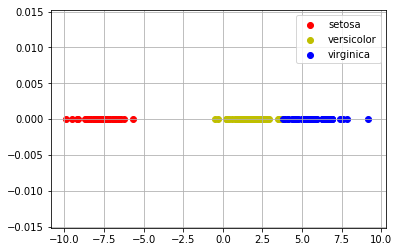

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 读取iris数据，
# 这个数据的特征维度为4维
# 样本的类别有三中
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

# 将数据的特征维度降为一维
# 当然这里可以将n_components设置为任何小于原始特征维度的数目
lda = LinearDiscriminantAnalysis(n_components=1)
X_r2 = lda.fit(X, y).transform(X)
X_Zreo = np.zeros(X_r2.shape)

for c ,i , target_names in zip('ryb', [0, 1, 2], target_names):
    plt.scatter(X_r2[y == i], X_Zreo[y == i], c=c, label=target_names)

plt.grid()
plt.legend()
plt.show()

X.shape: (26, 2)
[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


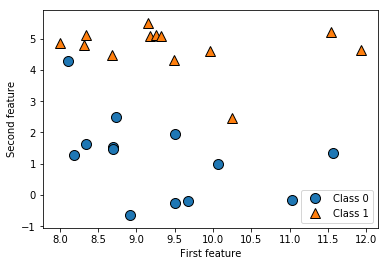

In [5]:
import mglearn
#generate dataset
X, y = mglearn.datasets.make_forge()
#plot dataset
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.legend(["Class 0","Class 1"],loc=4)
plt.xlabel("First feature")
plt.ylabel("Second feature")
print("X.shape: {}".format(X.shape))
print(X)
print(y)

Text(0,0.5,'Target')

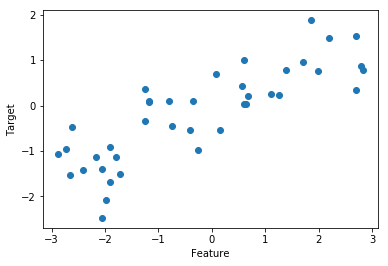

In [6]:
X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X,y,'o')
plt.ylim=(-3,3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [7]:
#使用癌症数据集（高纬，二分类）
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer() 
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [8]:
print("shape of cancer data:{}".format(cancer.data.shape))

shape of cancer data:(569, 30)


In [9]:
#查看不同类别的样本量
print("Sample counts per class:\n{}".format(
{n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [10]:
#查看特征,有30个特征
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [11]:
#print(format(cancer.DESCR))

In [12]:
#Boston Housing dataset，自变量和响应变量都是连续型数据
from sklearn.datasets import load_boston
boston = load_boston()


In [13]:
#查看数据目录
print("boston.keys(): \n{}".format(boston.keys()))

boston.keys(): 
dict_keys(['data', 'target', 'feature_names', 'DESCR'])


In [14]:
#查看数据集大小
print("Data shape: {}".format(boston.data.shape))
print("Data target: \n{}".format(boston.target))

Data shape: (506, 13)
Data target: 
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 

In [15]:
print("Feature names: /n{}".format(boston.feature_names))

Feature names: /n['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [16]:
#查看数据集详细信息
print(format(boston.DESCR))

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [17]:
print("Data :n/{}".format(boston.data[1:10,:]))# 查看数据前10行

Data :n/[[2.7310e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 6.4210e+00
  7.8900e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9690e+02
  9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 0.0000e+00 4.6900e-01 7.1850e+00
  6.1100e+01 4.9671e+00 2.0000e+00 2.4200e+02 1.7800e+01 3.9283e+02
  4.0300e+00]
 [3.2370e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.9980e+00
  4.5800e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9463e+02
  2.9400e+00]
 [6.9050e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 7.1470e+00
  5.4200e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9690e+02
  5.3300e+00]
 [2.9850e-02 0.0000e+00 2.1800e+00 0.0000e+00 4.5800e-01 6.4300e+00
  5.8700e+01 6.0622e+00 3.0000e+00 2.2200e+02 1.8700e+01 3.9412e+02
  5.2100e+00]
 [8.8290e-02 1.2500e+01 7.8700e+00 0.0000e+00 5.2400e-01 6.0120e+00
  6.6600e+01 5.5605e+00 5.0000e+00 3.1100e+02 1.5200e+01 3.9560e+02
  1.2430e+01]
 [1.4455e-01 1.2500e+01 7.8700e+00 0.0000e+00 5.2400e-01 6.1720e+00
  9.6100e+01 5.9505e+00 

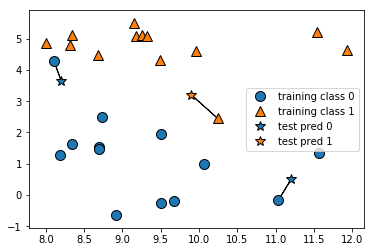

In [18]:
#knn算法简单描述
mglearn.plots.plot_knn_classification(n_neighbors=1)

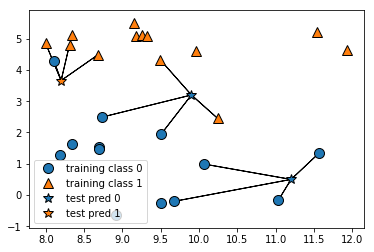

In [19]:
mglearn.plots.plot_knn_classification(n_neighbors=4)

In [20]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()#使用mglearn生成的数据
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [21]:
print(X)
print(y)

[[ 9.96346605  4.59676542]
 [11.0329545  -0.16816717]
 [11.54155807  5.21116083]
 [ 8.69289001  1.54322016]
 [ 8.1062269   4.28695977]
 [ 8.30988863  4.80623966]
 [11.93027136  4.64866327]
 [ 9.67284681 -0.20283165]
 [ 8.34810316  5.13415623]
 [ 8.67494727  4.47573059]
 [ 9.17748385  5.09283177]
 [10.24028948  2.45544401]
 [ 8.68937095  1.48709629]
 [ 8.92229526 -0.63993225]
 [ 9.49123469  4.33224792]
 [ 9.25694192  5.13284858]
 [ 7.99815287  4.8525051 ]
 [ 8.18378052  1.29564214]
 [ 8.7337095   2.49162431]
 [ 9.32298256  5.09840649]
 [10.06393839  0.99078055]
 [ 9.50048972 -0.26430318]
 [ 8.34468785  1.63824349]
 [ 9.50169345  1.93824624]
 [ 9.15072323  5.49832246]
 [11.563957    1.3389402 ]]
[1 0 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0]


In [22]:
#调用knn算法
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [23]:
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [24]:
print("Test set predictions:{}".format(clf.predict(X_test)))

Test set predictions:[1 0 1 0 1 0 0]


In [25]:
print("Test set accuracy:{:.2f}".format(clf.score(X_test,y_test)))

Test set accuracy:0.86


In [26]:
#zip?

In [27]:
#mglearn.plots.plot_2d_separator?

'\n当neighbor参数越大时，决策面越平滑。对应的模型越简单；当neighbor参数越小时，会得到复杂度较高的模型\n'

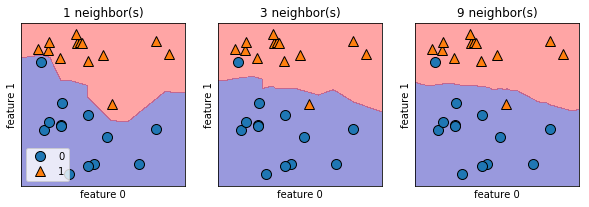

In [28]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)
'''
当neighbor参数越大时，决策面越平滑。对应的模型越简单；当neighbor参数越小时，会得到复杂度较高的模型
'''

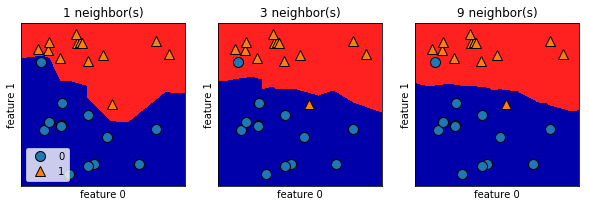

In [29]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax,alpha=1)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

In [30]:
"""
#plot_2D_separator源码
import numpy as np
import matplotlib.pyplot as plt
from .plot_helpers import cm2, cm3, discrete_scatter


def plot_2d_classification(classifier, X, fill=False, ax=None, eps=None,
                           alpha=1, cm=cm3):
    # multiclass
    if eps is None:
        eps = X.std() / 2.

    if ax is None:
        ax = plt.gca()

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 1000)
    yy = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    decision_values = classifier.predict(X_grid)
    ax.imshow(decision_values.reshape(X1.shape), extent=(x_min, x_max,
                                                         y_min, y_max),
              aspect='auto', origin='lower', alpha=alpha, cmap=cm)
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())


def plot_2d_scores(classifier, X, ax=None, eps=None, alpha=1, cm="viridis",
                   function=None):
    # binary with fill
    if eps is None:
        eps = X.std() / 2.

    if ax is None:
        ax = plt.gca()

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    if function is None:
        function = getattr(classifier, "decision_function",
                           getattr(classifier, "predict_proba"))
    else:
        function = getattr(classifier, function)
    decision_values = function(X_grid)
    if decision_values.ndim > 1 and decision_values.shape[1] > 1:
        # predict_proba
        decision_values = decision_values[:, 1]
    grr = ax.imshow(decision_values.reshape(X1.shape),
                    extent=(x_min, x_max, y_min, y_max), aspect='auto',
                    origin='lower', alpha=alpha, cmap=cm)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    return grr


def plot_2d_separator(classifier, X, fill=False, ax=None, eps=None, alpha=1,
                      cm=cm2, linewidth=None, threshold=None,
                      linestyle="solid"):
    # binary?
    if eps is None:
        eps = X.std() / 2.

    if ax is None:
        ax = plt.gca()

    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 1000)
    yy = np.linspace(y_min, y_max, 1000)

    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0] if threshold is None else [threshold]
        fill_levels = [decision_values.min()] + levels + [
            decision_values.max()]
    except AttributeError:
        # no decision_function
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5] if threshold is None else [threshold]
        fill_levels = [0] + levels + [1]
    if fill:
        ax.contourf(X1, X2, decision_values.reshape(X1.shape),
                    levels=fill_levels, alpha=alpha, cmap=cm)
    else:
        ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels,
                   colors="black", alpha=alpha, linewidths=linewidth,
                   linestyles=linestyle, zorder=5)

    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())


if __name__ == '__main__':
    from sklearn.datasets import make_blobs
    from sklearn.linear_model import LogisticRegression
    X, y = make_blobs(centers=2, random_state=42)
    clf = LogisticRegression().fit(X, y)
    plot_2d_separator(clf, X, fill=True)
    discrete_scatter(X[:, 0], X[:, 1], y)
    plt.show()
    """

'\n#plot_2D_separator源码\nimport numpy as np\nimport matplotlib.pyplot as plt\nfrom .plot_helpers import cm2, cm3, discrete_scatter\n\n\ndef plot_2d_classification(classifier, X, fill=False, ax=None, eps=None,\n                           alpha=1, cm=cm3):\n    # multiclass\n    if eps is None:\n        eps = X.std() / 2.\n\n    if ax is None:\n        ax = plt.gca()\n\n    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps\n    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps\n    xx = np.linspace(x_min, x_max, 1000)\n    yy = np.linspace(y_min, y_max, 1000)\n\n    X1, X2 = np.meshgrid(xx, yy)\n    X_grid = np.c_[X1.ravel(), X2.ravel()]\n    decision_values = classifier.predict(X_grid)\n    ax.imshow(decision_values.reshape(X1.shape), extent=(x_min, x_max,\n                                                         y_min, y_max),\n              aspect=\'auto\', origin=\'lower\', alpha=alpha, cmap=cm)\n    ax.set_xlim(x_min, x_max)\n    ax.set_ylim(y_min, y_max)\n    ax.set_xti

In [31]:
#在癌症数据集上验证knn算法，neighbor值与准确率的关系
#from sklearn.datasets import load_breast_cancer

In [32]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
        cancer.data, cancer.target, stratify=cancer.target, random_state=66)

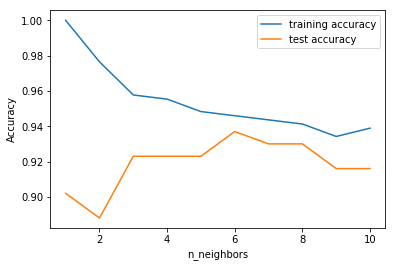

In [33]:
#癌症数据集，knn分类
training_accuracy = []
test_accuracy = []
#try n_neighbors from 1 to 10
neighbors_settings = range(1,11)
for n_neighbors in neighbors_settings:
    #bulid the model
    clf = KNeighborsClassifier(n_neighbors)
    clf.fit(X_train,y_train)
    #record training set accuracy
    training_accuracy.append(clf.score(X_train,y_train))
    #record generalization accuracy
    test_accuracy.append(clf.score(X_test,y_test))
    
plt.plot(neighbors_settings,training_accuracy,label = 'training accuracy')
plt.plot(neighbors_settings,test_accuracy,label = 'test accuracy')
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()#将标签加入图中

In [34]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC
from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42) 
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train))) 
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))


Training set score: 0.955
Test set score: 0.958


In [35]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train))) 
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.972
Test set score: 0.965


In [36]:

logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train))) 
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


TypeError: 'tuple' object is not callable

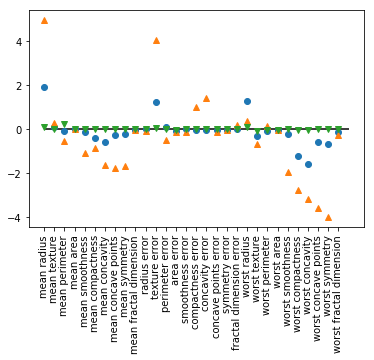

In [37]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

In [38]:
#train_test_split?

In [39]:
#random_state设置伪随机数，当seed相同时，可以产生相同的随机序列 ,使得随机采样能得到相同的样本，
#控制不必要的变量
#仍以上面的seed为例，但执行多次
# 利用循环，执行4次
import numpy
for i in [1,2,3,4]:
    rng = numpy.random.RandomState(2)
    arrayA = rng.uniform(0,1,(2,2))
    print ('i = %s' % (i))
    print(arrayA)

i = 1
[[0.4359949  0.02592623]
 [0.54966248 0.43532239]]
i = 2
[[0.4359949  0.02592623]
 [0.54966248 0.43532239]]
i = 3
[[0.4359949  0.02592623]
 [0.54966248 0.43532239]]
i = 4
[[0.4359949  0.02592623]
 [0.54966248 0.43532239]]


In [40]:
#设置为随机数为不同值
for i in [1,2,3,4]:
    rng = numpy.random.RandomState(2+i)
    arrayB = rng.uniform(0,1,(2,2))
    print ('i = %s' % (i))
    print(arrayB)

i = 1
[[0.5507979  0.70814782]
 [0.29090474 0.51082761]]
i = 2
[[0.96702984 0.54723225]
 [0.97268436 0.71481599]]
i = 3
[[0.22199317 0.87073231]
 [0.20671916 0.91861091]]
i = 4
[[0.89286015 0.33197981]
 [0.82122912 0.04169663]]


TypeError: 'tuple' object is not callable

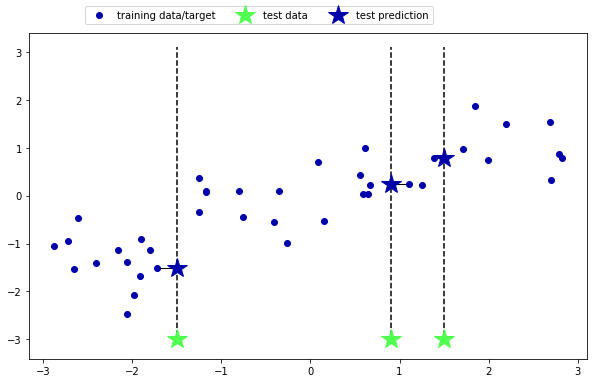

In [41]:
#使用wave dataset作knn回归
mglearn.plots.plot_knn_regression(n_neighbors=1)

In [42]:
from sklearn.neighbors import KNeighborsRegressor
X,y = mglearn.datasets.make_wave(n_samples=40)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train,y_train)
print("Test set predictions:\n{}".format(reg.predict(X_test)))
print(X.shape)
print(y.shape)
print(y)

Test set predictions:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]
(40, 1)
(40,)
[-0.44822073  0.33122576  0.77932073  0.03497884 -1.38773632 -2.47196233
 -1.52730805  1.49417157  1.00032374  0.22956153 -1.05979555  0.7789638
  0.75418806 -1.51369739 -1.67303415 -0.90496988  0.08448544 -0.52734666
 -0.54114599 -0.3409073   0.21778193 -1.12469096  0.37299129  0.09756349
 -0.98618122  0.96695428 -1.13455014  0.69798591  0.43655826 -0.95652133
  0.03527881 -2.08581717 -0.47411033  1.53708251  0.86893293  1.87664889
  0.0945257  -1.41502356  0.25438895  0.09398858]


TypeError: 'tuple' object is not callable

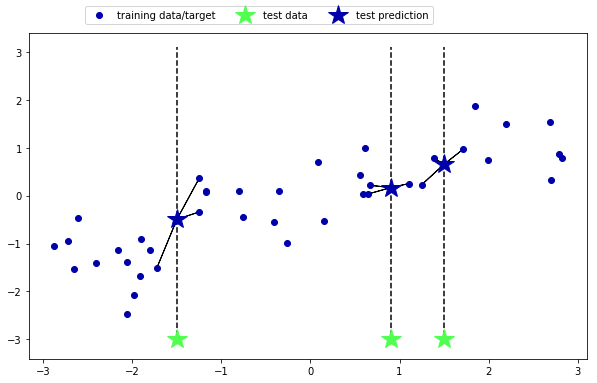

In [43]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [44]:
print("Test set R^2:{:.2f}".format(reg.score(X_test,y_test)))

Test set R^2:0.83


In [ ]:
#

In [ ]:
#

In [45]:
print(y_train)

[ 0.69798591  1.87664889 -1.41502356  0.77932073  0.09398858  0.03527881
  0.86893293  0.08448544  0.0945257   1.00032374 -1.51369739 -2.47196233
 -0.52734666 -1.67303415  1.53708251  1.49417157 -0.47411033  0.33122576
 -1.13455014  0.75418806 -2.08581717 -0.98618122 -1.52730805  0.09756349
 -1.12469096 -0.3409073   0.22956153  0.25438895  0.03497884 -0.44822073]


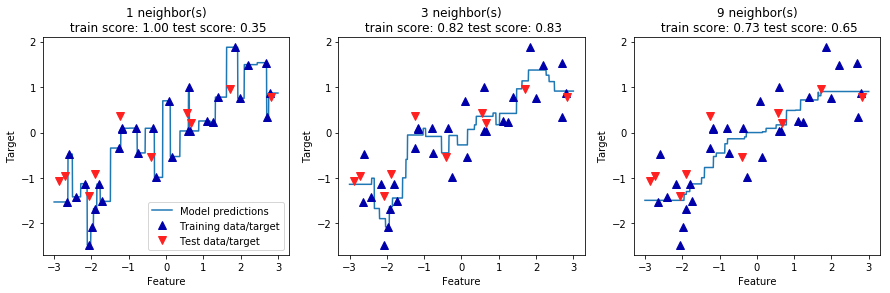

In [46]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
# create 1,000 data points, evenly spaced between -3 and 3 line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
        # make predictions using 1, 3, or 9 neighbors
        reg = KNeighborsRegressor(n_neighbors=n_neighbors)
        reg.fit(X_train, y_train)
        ax.plot(line, reg.predict(line))
        ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
        ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
        ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
        ax.set_xlabel("Feature")
        ax.set_ylabel("Target")
        axes[0].legend(["Model predictions", "Training data/target","Test data/target"], loc="best")


In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
# create 1,000 data points, evenly spaced between -3 and 3 line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
        # make predictions using 1, 3, or 9 neighbors
        reg = KNeighborsRegressor(n_neighbors=n_neighbors)
        reg.fit(X_train, y_train)
        ax.plot(line, reg.predict(line))
        ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
        ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
        ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
        ax.set_xlabel("Feature")
        ax.set_ylabel("Target")
        axes[1].legend(["Model predictions", "Training data/target","Test data/target"], loc="best")



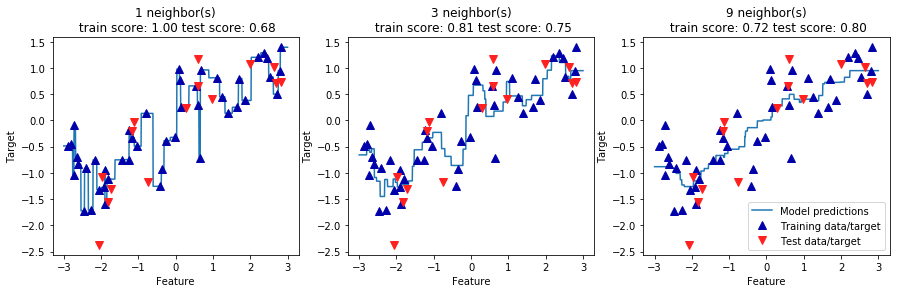

In [53]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
# create 1,000 data points, evenly spaced between -3 and 3 line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
        # make predictions using 1, 3, or 9 neighbors
        reg = KNeighborsRegressor(n_neighbors=n_neighbors)
        reg.fit(X_train, y_train)
        ax.plot(line, reg.predict(line))
        ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
        ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
        ax.set_title("{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(n_neighbors, reg.score(X_train, y_train), reg.score(X_test, y_test)))
        ax.set_xlabel("Feature")
        ax.set_ylabel("Target")
        axes[2].legend(["Model predictions", "Training data/target","Test data/target"], loc="best")
#当k=1时，训练集中的每个数据对于预测值有很大影响，预测结果非常不稳定，当k更大时，预测模型更平滑，但是在训练集上的得分更低

In [ ]:
##参数选择：
#knn算法中的两个参数是neighbors值和样本之间距离公式，一般neighbors为3或者5会获得比较好的效果，
#距离一般默认选取欧式距离，欧式距离也被验证在多个数据集上有较好的效果

##优点
#knn算法优点是简单容易理解

##缺点
#当训练集样本量很大时，knn算法分类速度慢，并且当数据集特征量较多时它不适合
#当数据集上很多特征为0时，算法表现不是很好

In [ ]:
#

In [52]:
#Linear regression
from sklearn.linear_model import LinearRegression
X,y = mglearn.datasets.make_wave(n_samples=60)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)
lr = LinearRegression().fit(X_train,y_train)
print("lr.coef_:{}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))



lr.coef_:[0.39390555]
lr.intercept_: -0.031804343026759746


In [ ]:
lr.coef_?

In [ ]:
LinearRegression?

In [47]:
print("Traning set score:{:.2f}".format(lr.score(X_train,y_train)))
print("Testing set score:{:.2f}".format(lr.score(X_test,y_test)))

NameError: name 'lr' is not defined

In [48]:
print(X)
print(y)

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]
 [-2.87649303]
 [ 2.81945911]
 [ 1.99465584]
 [-1.72596534]
 [-1.9090502 ]
 [-1.89957294]
 [-1.17454654]
 [ 0.14853859]
 [-0.40832989]
 [-1.25262516]
 [ 0.67111737]
 [-2.16303684]
 [-1.24713211]
 [-0.80182894]
 [-0.26358009]
 [ 1.71105577]
 [-1.80195731]
 [ 0.08540663]
 [ 0.55448741]
 [-2.72129752]
 [ 0.64526911]
 [-1.97685526]
 [-2.60969044]
 [ 2.69331322]
 [ 2.7937922 ]
 [ 1.85038409]
 [-1.17231738]
 [-2.41396732]
 [ 1.10539816]
 [-0.35908504]]
[-0.44822073  0.33122576  0.77932073  0.03497884 -1.38773632 -2.47196233
 -1.52730805  1.49417157  1.00032374  0.22956153 -1.05979555  0.7789638
  0.75418806 -1.51369739 -1.67303415 -0.90496988  0.08448544 -0.52734666
 -0.54114599 -0.3409073   0.21778193 -1.12469096  0.37299129  0.09756349
 -0.98618122  0.96695428 -1.13455014  0.69798591  0.43655826 -0.95652133
  0.03527881 -2.08581717 -0.4741103

In [ ]:
#训练集和测试集拟合度差不多，可能存在欠拟合，对于一维数据集，不太可能出现过拟合情况
#线性模型对于高维数据集更有优势

In [49]:
X,y=mglearn.datasets.load_extended_boston()
print(len(X[1,:]))#X有104个特征
#506哥样本104个特征
print(X.shape)

104
(506, 104)


In [50]:
#
print(y.shape)
print(y)

(506,)
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.


In [54]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)
lr =LinearRegression().fit(X_train,y_train)
print("Training set score:{:.2f}".format(lr.score(X_train,y_train)))
print("Testing set score:{:.2f}".format(lr.score(X_test,y_test)))

Training set score:0.66
Testing set score:0.69


In [55]:
#训练集得分远远高于测试集，出现过拟合情况，考虑岭回归
from sklearn.linear_model import Ridge


In [56]:
ridge = Ridge(alpha=1).fit(X_train,y_train)

In [57]:
print("Training set score:{:.2f}".format(ridge.score(X_train,y_train)))
print("Test set score:.{:.2f}".format(ridge.score(X_test,y_test)))

Training set score:0.66
Test set score:.0.70


In [ ]:
#

In [58]:
#

In [59]:
#相比于线性回归，岭回归在训练集上score降低，在测试集上score升高，泛化误差降低，岭回归使用alpha参数对模型复杂度和在训练集上的误差作折中，
#增加模型复杂度，牺牲了在训练集上的表现，获得了更好的泛化性能。

In [60]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.66
Test set score: 0.71


In [61]:
ridge01 = Ridge(alpha=0.1).fit(X_train,y_train)
print("Training set score:{:.2f}".format(ridge01.score(X_train,y_train)))
print("Testing set score:{:.2f}".format(ridge01.score(X_test,y_test)))

Training set score:0.66
Testing set score:0.69


TypeError: 'tuple' object is not callable

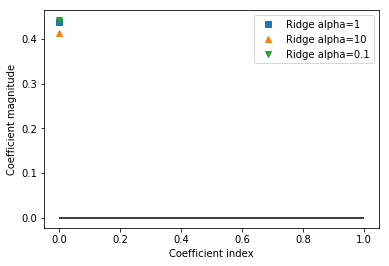

In [62]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(ridge.coef_))
plt.legend()
plt.ylim(-4,4)
#alpha值越小，参数的振幅越大。

In [63]:
#

[0.43835808]


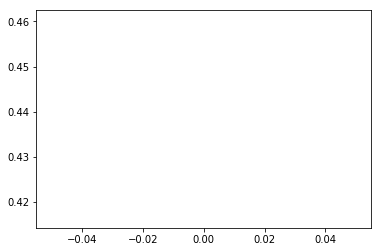

In [64]:
print(ridge.coef_)
plt.plot(ridge.coef_)

[0.44121673]


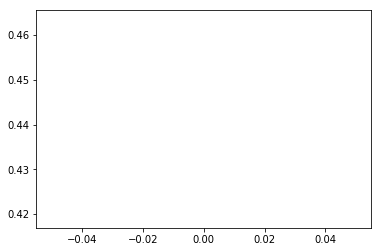

In [65]:
print(ridge01.coef_)
plt.plot(ridge01.coef_)

[0.41168494]


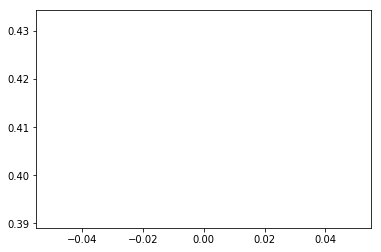

In [66]:
print(ridge10.coef_)
plt.plot(ridge10.coef_)

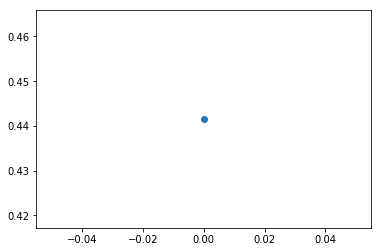

In [67]:
plt.plot(lr.coef_, 'o', label="LinearRegression")

In [ ]:
#

TypeError: 'tuple' object is not callable

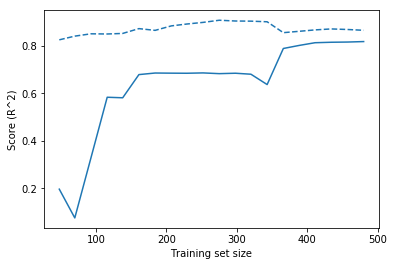

In [68]:
#固定alpha值，通过改变样本容量来了解alpha对模型泛化性能的影响
mglearn.plots.plot_ridge_n_samples()

In [69]:
#当数据集样本量小于400时，线性回归模型不具有学习能力，此时岭回归较为有效，但是当数据集样本量大于400
#并且逐渐增大的时候，岭回归的优势逐渐消失，两者的泛化效果差不多，并且数据集增大，过拟合风险会降低

In [70]:
X,y=mglearn.datasets.load_extended_boston()
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

In [71]:
#LASSO正则化线性模型
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test))) 
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [72]:
# we increase the default setting of "max_iter",
# otherwise the model would warn us that we should increase max_iter. 
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train) 
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train))) 
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test))) 
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


In [73]:
lasso00001 = Lasso(alpha=0.0001, max_iter=100000).fit(X_train, y_train) 
print("Training set score: {:.2f}".format(lasso00001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso00001.score(X_test, y_test))) 
print("Number of features used: {}".format(np.sum(lasso00001.coef_ != 0)))

Training set score: 0.95
Test set score: 0.64
Number of features used: 94


TypeError: 'tuple' object is not callable

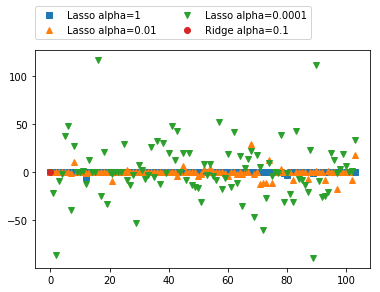

In [74]:
plt.plot(lasso.coef_, 's', label="Lasso alpha=1")
plt.plot(lasso001.coef_, '^', label="Lasso alpha=0.01")
plt.plot(lasso00001.coef_, 'v', label="Lasso alpha=0.0001")
plt.plot(ridge01.coef_, 'o', label="Ridge alpha=0.1")
plt.legend(ncol=2, loc=(0, 1.05))
plt.ylim(-25, 25)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")

In [ ]:
mglearn.plots.plot_linear_svc_regularization()
#Using low values of C will cause the algorithms to try to adjust to the “majority” of data points, while using 
#a higher value of C stresses the importance that each individual data point be classi‐ fied correctly. Here is 
#an illustration using LinearSVC 

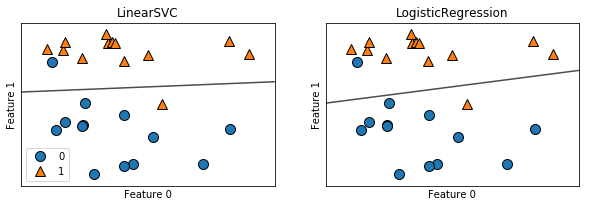

In [75]:
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import LinearSVC
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes): 
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__)) 
    ax.set_xlabel("Feature 0") 
    ax.set_ylabel("Feature 1")
    axes[0].legend()
# 线性SVC和逻辑回归都使用L2正则表达式，参数C代表了正则化程度，C越大正则化程度越低，when you use a high value for the parameter C, Logis ticRegression and LinearSVC try 
#to fit the training set as best as possible, 
#while with low values of the parameter C, the models put more emphasis on finding a coefficient vector (w) that is close to zero.

In [76]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42) 
logreg = LogisticRegression().fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train))) 
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))


Training set score: 0.953
Test set score: 0.958


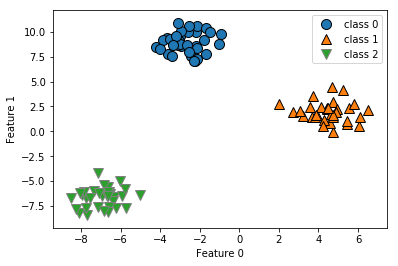

In [77]:
#使用one vs left 方法处理三分类问题
from sklearn.datasets import make_blobs
X,y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["class 0","class 1","class 2"])

In [78]:
#训练线性SVC分类器
linear_svm = LinearSVC().fit(X,y)
print("coefficient shape: ",linear_svm.coef_.shape)
print("Intercept shape",linear_svm.intercept_.shape)

coefficient shape:  (3, 2)
Intercept shape (3,)


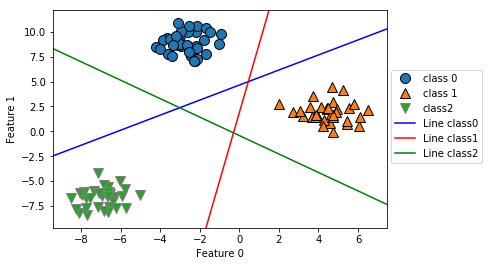

In [79]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef, intercept, color in zip(linear_svm.coef_,linear_svm.intercept_,['b','r','g']):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],c=color)
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")
    plt.legend(['class 0','class 1','class2','Line class0','Line class1','Line class2'],loc=(1.01,0.3))
    

In [80]:
#对于中间的我区域分类问题如何解决：
#把位于中间区域的点归类为距离决策线最近的那一类

Text(0,0.5,'Feature 1')

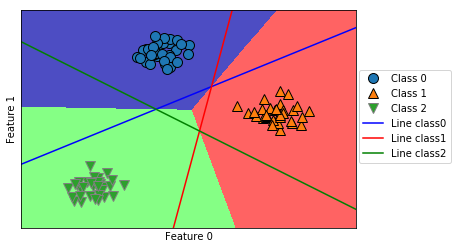

In [81]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=.7)
#mglearn.plots.plot_2d_classfication(linear_svm,X,fill=True,alpha=.7)
mglearn.discrete_scatter(X[:,0],X[:,1],y)
line = np.linspace(-15,15)
for coef,intercept,color in zip(linear_svm.coef_,linear_svm.intercept_,['b','r','g']):
    plt.plot(line,-(line*coef[0]+intercept)/coef[1],c=color)
plt.legend(['Class 0','Class 1','Class 2','Line class0','Line class1','Line class2'],loc=(1.01,0.3))
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [82]:
from sklearn.tree import DecisionTreeClassifier
cancer =load_breast_cancer()
X_train,X_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train,y_train)
print("Accuracy on training set:{:3f}".format(tree.score(X_train,y_train)))
print("Accuracy on testing set:{:3f}".format(tree.score(X_test,y_test)))

Accuracy on training set:1.000000
Accuracy on testing set:0.937063


In [83]:
#减枝策略
tree = DecisionTreeClassifier(max_depth=4,random_state=0)
tree.fit(X_train,y_train)
print("Accuracy on training set:{:.3f}".format(tree.score(X_train,y_train)))
print("Accuracy on testing set:{:.3f}".format(tree.score(X_test,y_test)))

Accuracy on training set:0.988
Accuracy on testing set:0.951


In [84]:
#

In [85]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],feature_names=cancer.feature_names, impurity=False, filled=True)

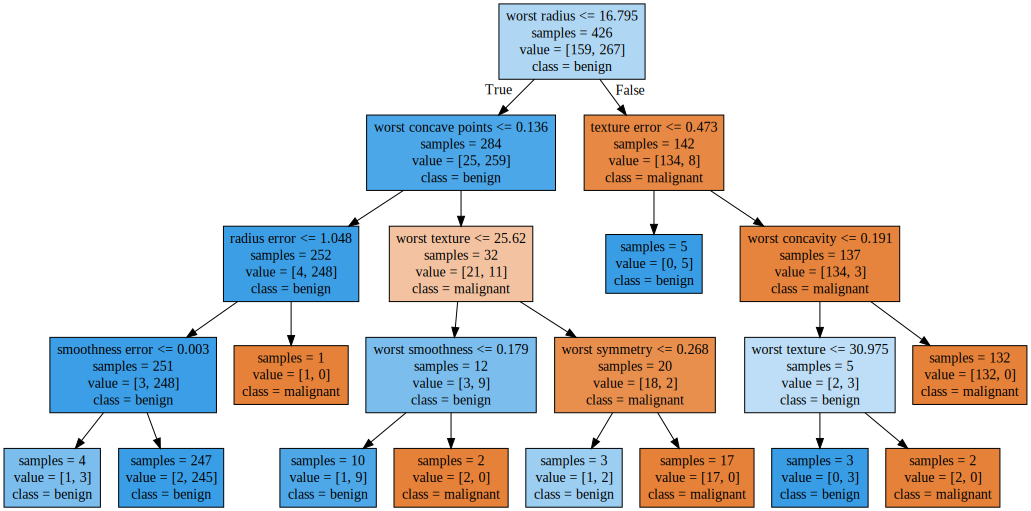

In [95]:
import graphviz
with open("tree.dot") as f: 
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [87]:
print("Feature importances:\n{}".format(tree.feature_importances_))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


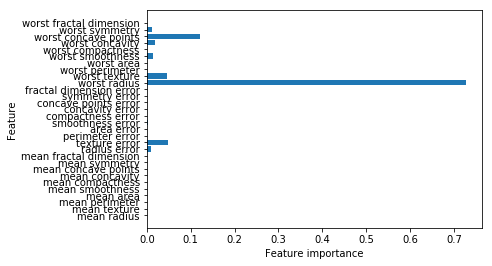

In [92]:
# 特征重要性可视化
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), cancer.feature_names) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances_cancer(tree)